<a href="https://colab.research.google.com/github/kothapallysidhartha/stat-ml/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
data = pd.read_csv("card_transdata.csv")
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999794,1.623901,0.385844,1.176781,0,0,0,1,0
999795,11.607613,5.841700,1.284158,1,1,0,1,0
999796,7.612152,5.086330,3.918700,1,0,0,1,0
999797,1.550459,3.321246,0.330673,0,0,0,0,0


In [ ]:
data.info()
data2 = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999799 entries, 0 to 999798
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999799 non-null  float64
 1   distance_from_last_transaction  999799 non-null  float64
 2   ratio_to_median_purchase_price  999799 non-null  float64
 3   repeat_retailer                 999799 non-null  int64  
 4   used_chip                       999799 non-null  int64  
 5   used_pin_number                 999799 non-null  int64  
 6   online_order                    999799 non-null  int64  
 7   fraud                           999799 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB




> Indented block



**Features:**

**distance_from_home**: the distance from home where the transaction happened.

**distance_from_last_transaction**: the distance from last transaction happened.

r** **bold text**atio_to_median_purchase_price**: Ratio of purchased price transaction to median purchase price.

**repeat_retailer**: Is the transaction happened from same retailer.

**used_chip**: Is the transaction through chip (credit card).

**used_pin_numbe**r: Is the transaction happened by using PIN number.

**online_order**: Is the transaction an online order.

**fraud**: Is the transaction fraudulent.

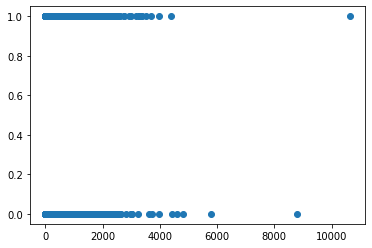

In [ ]:
plt.scatter(data['distance_from_home'],data['fraud'])

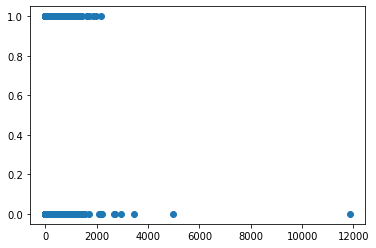

In [ ]:
plt.scatter(data['distance_from_last_transaction'],data['fraud'])

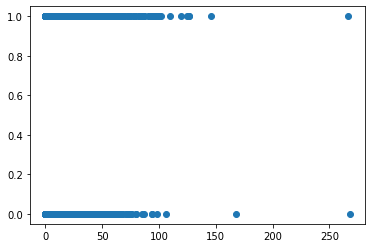

In [ ]:
plt.scatter(data['ratio_to_median_purchase_price'],data['fraud'])

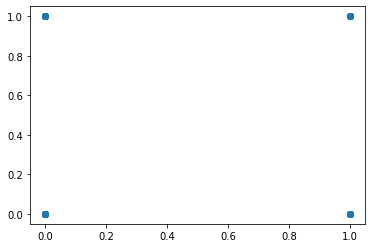

In [ ]:
plt.scatter(data['used_chip'],data['fraud'])

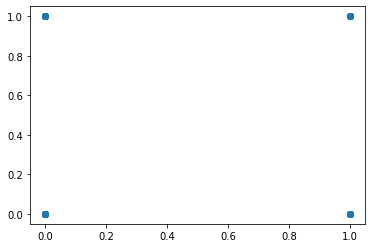

In [ ]:
plt.scatter(data['repeat_retailer'],data['fraud'])

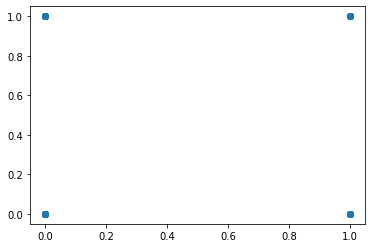

In [ ]:
plt.scatter(data['used_pin_number'],data['fraud'])

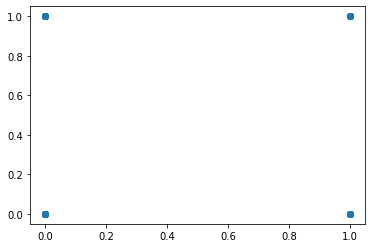

In [ ]:
plt.scatter(data['online_order'],data['fraud'])

In [ ]:
x=data[['online_order','used_pin_number','repeat_retailer','used_chip','ratio_to_median_purchase_price','distance_from_last_transaction','distance_from_home']]
y=data[['fraud']]
print(x)
print(y)

        online_order  used_pin_number  repeat_retailer  used_chip  \
0                  0                0                1          1   
1                  0                0                1          0   
2                  1                0                1          0   
3                  1                0                1          1   
4                  1                0                1          1   
...              ...              ...              ...        ...   
999794             1                0                0          0   
999795             1                0                1          1   
999796             1                0                1          0   
999797             0                0                0          0   
999798             1                1                1          1   

        ratio_to_median_purchase_price  distance_from_last_transaction  \
0                             1.945940                        0.311140   
1                      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
print("length of training rows=",len(x_train))
x_train

length of training rows= 699859


,online_order,used_pin_number,repeat_retailer,used_chip,ratio_to_median_purchase_price,distance_from_last_transaction,distance_from_home
818142,1,0,1,0,1.115920,0.928248,141.444169
414908,0,0,1,0,0.280237,1.758245,3.119174
189864,1,0,1,0,0.774350,0.122071,5.791293
494134,1,1,1,1,1.465307,1.373644,4.037935
774281,0,0,1,0,0.738553,2.554693,38.963735
...,...,...,...,...,...,...,...
652885,1,0,1,0,0.616862,0.002627,20.599519
108297,0,0,1,0,0.682278,4.620521,2.862293
56019,0,0,0,0,0.369960,7.900907,1.602943
720709,1,0,1,1,4.155947,0.138793,33.249085


KNN


In [ ]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999799.000000,999799.000000,999799.000000,999799.000000,999799.000000,999799.000000,999799.000000,999799.000000
mean,26.628961,5.036491,1.824205,0.881531,0.350392,0.100613,0.650556,0.087404
std,65.394828,25.844593,2.799550,0.323163,0.477093,0.300816,0.476795,0.282426
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.877858,0.296660,0.475683,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967583,0.998631,0.997748,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743699,3.355606,2.096422,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
knn=neighbors.KNeighborsClassifier(n_neighbors=1000,weights='distance')
model=knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
y=data[['fraud']]
y=np.array(y['fraud'])

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
accuracy=metrics.accuracy_score(y_test,predictions)
print('Accuracy =',accuracy)


Accuracy = 0.9481446289257851


Logistic regression

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:",cm)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix: [[181009   1311]
 [  6903  10737]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


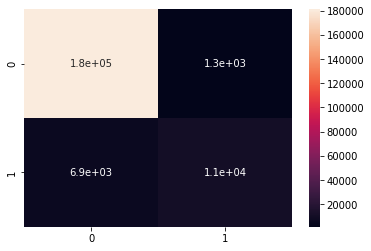

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9589217843568714
